<a href="https://colab.research.google.com/github/TomPhanAnh/FPT-Data-Science/blob/DSP302x_Data-Analysis-with-Python/DSP302x_ASM2_A_VN__AnhptFX12081_funix_edu_vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''

!pip install pycountry_convert

     |████████████████████████████████| 10.1 MB 31.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 207 kB 32.8 MB/s 
     |████████████████████████████████| 297 kB 28.9 MB/s 
     |████████████████████████████████| 297 kB 42.0 MB/s 
     |████████████████████████████████| 296 kB 46.4 MB/s 
     |████████████████████████████████| 296 kB 48.6 MB/s 
     |████████████████████████████████| 280 kB 63.2 MB/s 
     |████████████████████████████████| 280 kB 31.4 MB/s 
     |████████████████████████████████| 280 kB 21.6 MB/s 
     |████████████████████████████████| 280 kB 15.5 MB/s 
     |████████████████████████████████| 279 kB 38.9 MB/s 
     |████████████████████████████████| 279 kB 40.5 MB/s 
     |████████████████████████████████| 272 kB 41.1 MB/s 
     |████████████████████████████████| 272 kB 44.2 MB/s 
     |████████████████████████████████| 272 kB 47.0 MB/s 
   

In [ ]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

cols = confirmed_df.columns
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:,cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()


# **Câu 1:**

Tính tổng số ca, tổng số người chết, tổng số người phục hồi và tổng số ca nhiễm đang điều trị (active cases) theo thời gian (đơn vị ngày).

In [ ]:
#Total case 
total_confirmed = confirmed.sum(axis = 0)
# Total Death
total_death = deaths.sum(axis = 0)
# Mortality rate 
mortality_rate = round(sum(total_death)/sum(total_confirmed),4)
print("Mortality Rate: {}".format(mortality_rate))
# Recovery rate
total_recoveries = recoveries.sum(axis = 0)
recoveries_rate = round(sum(total_recoveries)/sum(total_confirmed),4)
print("Recovery rate: {}".format(recoveries_rate))
# Total Active 
total_active = [total_confirmed - total_death - total_recoveries]

Mortality Rate: 0.019
Recovery rate: 0.1958


In [ ]:
print(confirmed['4/18/22'].sum(axis = 0))

505054564


In [ ]:
# Change data from horizontal to verital
base_stats = pd.DataFrame(columns = ['Date','Confirmed','Deaths','Recoveries'])
base_stats['Date'] = dates
# Add data 
base_stats['Confirmed'] = base_stats['Date'].apply(lambda x: sum(confirmed[x]))
base_stats['Deaths'] = base_stats['Date'].apply(lambda x: sum(deaths[x]))
base_stats['Recoveries'] = base_stats['Date'].apply(lambda x: sum(recoveries[x]))
base_stats['Active'] = base_stats['Confirmed'] - base_stats['Deaths'] - base_stats['Recoveries']

Text(0.5, 1.0, '# of Coronavirus Cases Over Time')

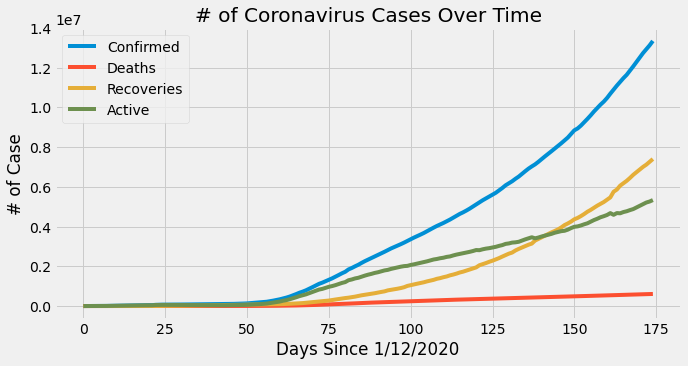

In [ ]:
base_stats.iloc[:175,:][['Confirmed','Deaths','Recoveries','Active']].plot(kind = 'line', figsize = (10,5))
plt.ylabel('# of Case')
plt.xlabel('Days Since 1/12/2020')
plt.title('# of Coronavirus Cases Over Time')

#**Câu 2**
Trực quan hóa số lượng và log(10) tổng số ca bệnh, tổng số người chết, tổng số người hồi phục và tổng số ca nhiễm đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường (line chart).

In [ ]:
import math
base_stat1 = base_stats.copy()
base_stat1[['Confirmed','Deaths','Recoveries','Active']] = base_stats[['Confirmed','Deaths','Recoveries','Active']].cumsum()
base_stat1['Confirmed'] = base_stat1['Confirmed'].apply(lambda x: math.log10(x))
base_stat1['Deaths']    = base_stat1['Deaths'].apply(lambda x: math.log10(x))
base_stat1['Recoveries']= base_stat1['Recoveries'].apply(lambda x: math.log10(x))
base_stat1['Active']    = base_stat1['Active'].apply(lambda x: math.log10(x))

Text(0.5, 1.0, 'Log of # of Coronavirus Cases Over time')

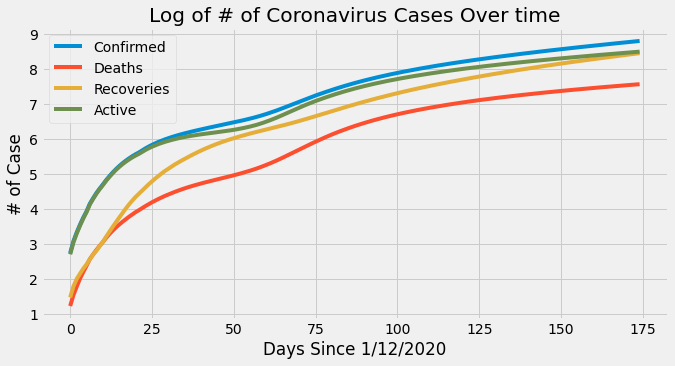

In [ ]:
#Plot data
base_stat1.iloc[:175,:][['Confirmed','Deaths','Recoveries','Active']].plot(kind = 'line', figsize = (10,5))
plt.ylabel('# of Case')
plt.xlabel('Days Since 1/12/2020')
plt.title("Log of # of Coronavirus Cases Over time")

#**Câu 3.** 
Trực quan tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số ca nhiễm đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường (line chart).

Text(0.5, 1.0, '# of Case')

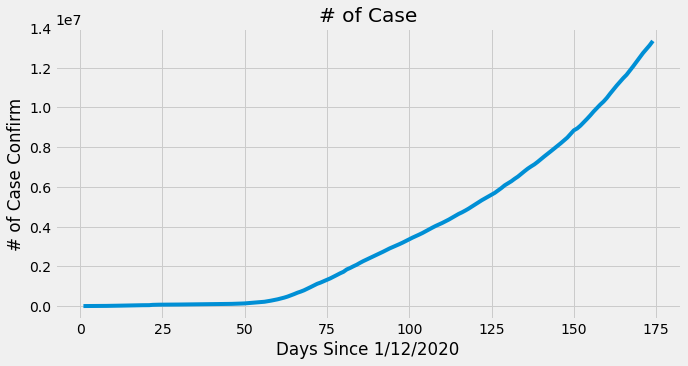

In [ ]:
# Total Confirmed
base_stats.iloc[1:175,:]['Confirmed'].plot(kind = 'line',figsize = (10,5))
plt.ylabel('# of Case Confirm')
plt.xlabel('Days Since 1/12/2020')
plt.title("# of Case")

Text(0.5, 1.0, '# of Case Death Over Time')

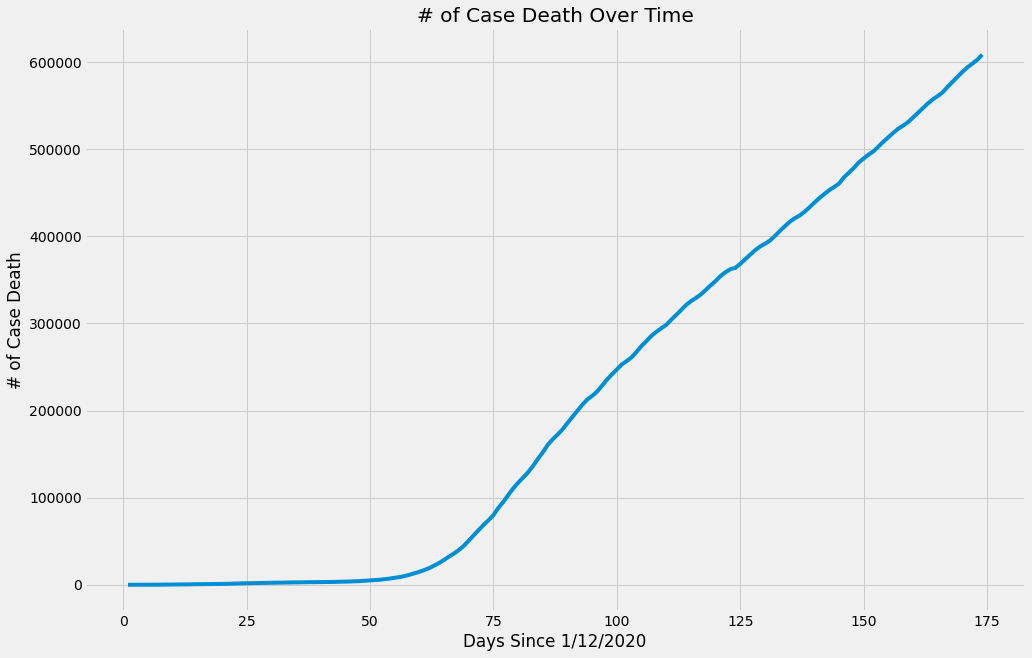

In [ ]:
# Total Deaths
base_stats.iloc[1:175,:]['Deaths'].plot(kind = 'line', figsize = (15,10))
plt.ylabel('# of Case Death')
plt.xlabel('Days Since 1/12/2020')
plt.title("# of Case Death Over Time")

Text(0.5, 1.0, '# of Case Recovered Over Time')

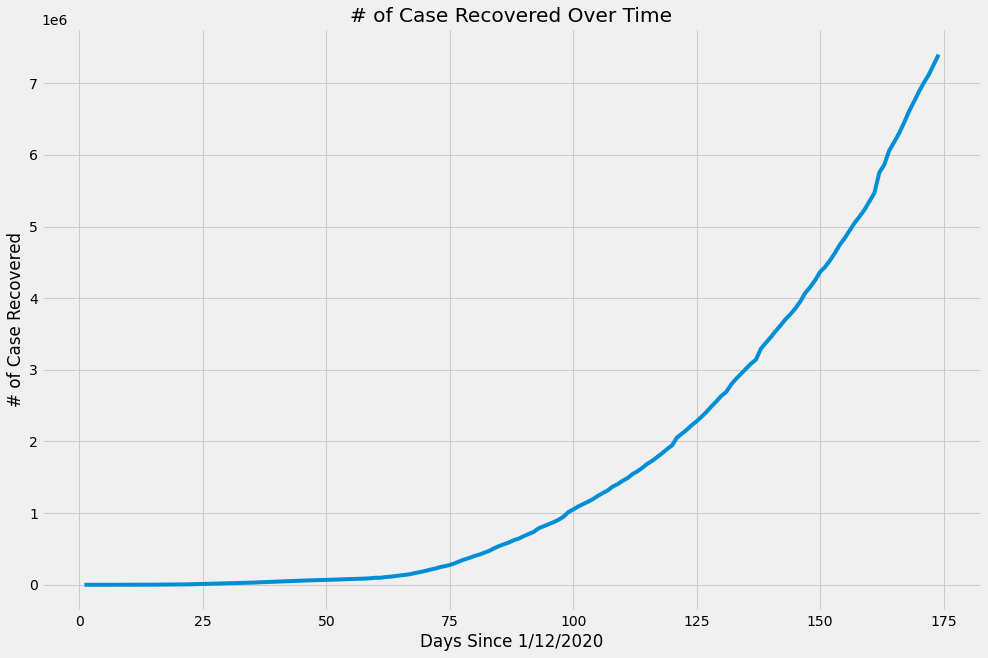

In [ ]:
# Total Confirmed
base_stats.iloc[1:175,:]['Recoveries'].plot(kind = 'line', figsize = (15,10))
plt.ylabel('# of Case Recovered')
plt.xlabel('Days Since 1/12/2020')
plt.title("# of Case Recovered Over Time")

# **Câu 4 & 5**
 Problem 5: Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.


In [ ]:
# Calculate the daily increases in total cases, deaths, recovered and active by time data
confirmed_change = base_stats['Confirmed'] - base_stats['Confirmed'].shift(1)
deaths_change = base_stats['Deaths'] - base_stats['Deaths'].shift(1)
recovered_change = base_stats['Recoveries'] - base_stats['Recoveries'].shift(1)
active_change = base_stats['Active'] - base_stats['Active'].shift(1)

In [ ]:
base_increase = pd.DataFrame({'Date': dates, 'Confirmed':confirmed_change,'Deaths':deaths_change,
                              'Recovered':recovered_change,'Active':active_change})

In [ ]:
base_increase

,Date,Confirmed,Deaths,Recovered,Active
0,1/22/20,NaN,NaN,NaN,NaN
1,1/23/20,100.0,1.0,2.0,97.0
2,1/24/20,287.0,8.0,7.0,272.0
3,1/25/20,493.0,16.0,3.0,474.0
4,1/26/20,683.0,14.0,14.0,655.0
...,...,...,...,...,...
813,4/14/22,969243.0,3708.0,0.0,965535.0
814,4/15/22,712929.0,2269.0,0.0,710660.0
815,4/16/22,552310.0,1512.0,0.0,550798.0
816,4/17/22,421858.0,1305.0,0.0,420553.0


Text(0.5, 0, 'Days since 1/22/2020')

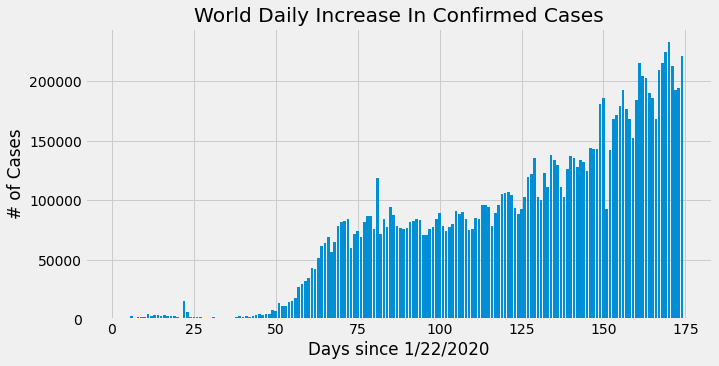

In [ ]:
# World Daily Increase Confirmed Cases
plt.figure(figsize = (10,5))
plt.bar(range(len(base_increase['Confirmed'][:175])), base_increase['Confirmed'][:175])
plt.title('World Daily Increase In Confirmed Cases')
plt.ylabel('# of Cases')
plt.xlabel("Days since 1/22/2020")

Text(0.5, 0, 'Days since 1/22/2020')

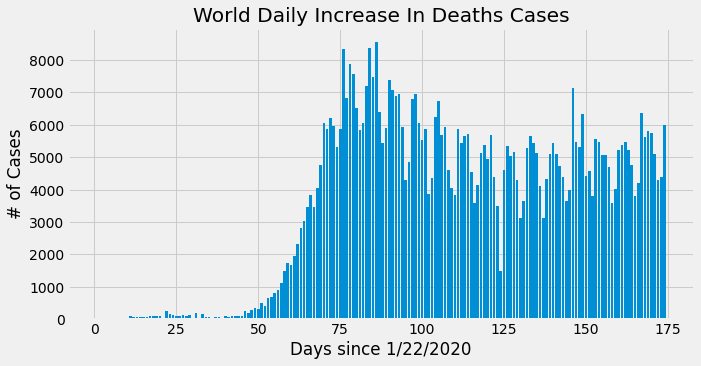

In [ ]:
# World Daily Increase Deaths Cases
fig = plt.figure(figsize = (10,5))
plt.bar(range(len(base_increase['Deaths'][:175])), base_increase['Deaths'][:175])
plt.title('World Daily Increase In Deaths Cases')
plt.ylabel('# of Cases')
plt.xlabel("Days since 1/22/2020")

Text(0.5, 0, 'Days since 1/22/2020')

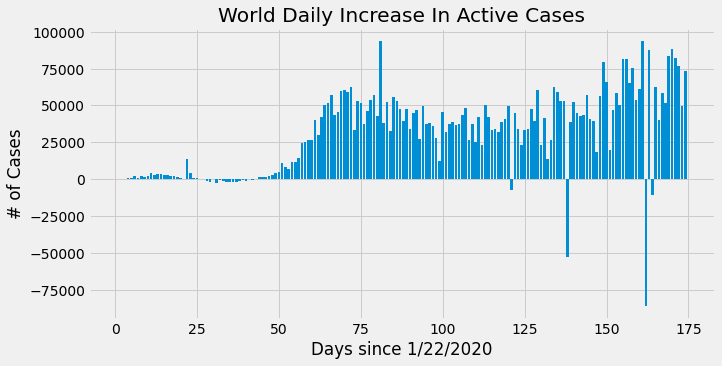

In [ ]:
# World Daily Increase Active Cases
fig = plt.figure(figsize = (10,5))
plt.bar(range(len(base_increase['Active'][:175])), base_increase['Active'][:175])
plt.title('World Daily Increase In Active Cases')
plt.ylabel('# of Cases')
plt.xlabel("Days since 1/22/2020")

Text(0.5, 0, 'Days since 1/22/2020')

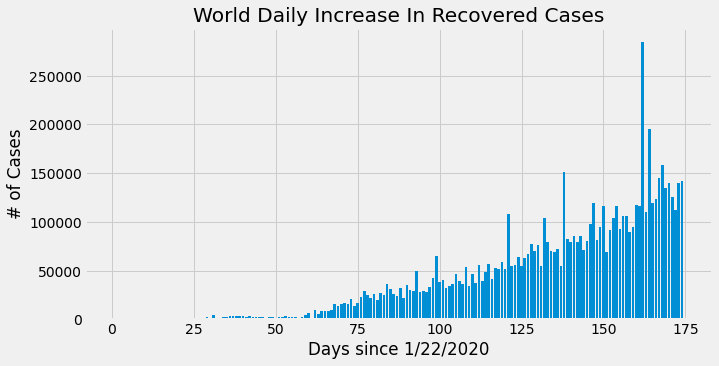

In [ ]:
# World Daily Increase Recovered Cases
fig = plt.figure(figsize = (10,5))
plt.bar(range(len(base_increase['Recovered'][:175])), base_increase['Recovered'][:175])
plt.title('World Daily Increase In Recovered Cases')
plt.ylabel('# of Cases')
plt.xlabel("Days since 1/22/2020")

# **Problem 6 & 7:**
Calculate the global mortality and recovered rate in percentage by time.

**7.1** Trực quan tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

**7.2**Trực quan tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

<Figure size 720x360 with 0 Axes>

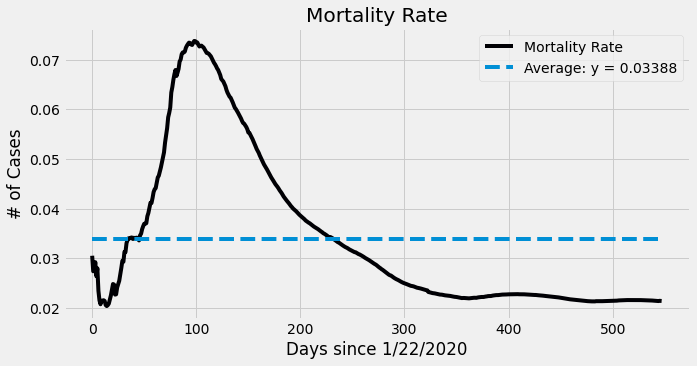

<Figure size 720x360 with 0 Axes>

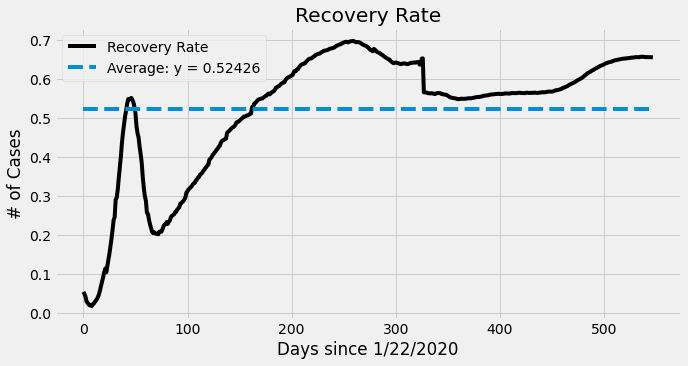

In [ ]:
mortality_rate = base_stats['Deaths']/base_stats['Confirmed']
Recovered_rate = base_stats['Recoveries']/base_stats['Confirmed']
for x,y in zip([mortality_rate, Recovered_rate],["Mortality Rate","Recovery Rate"]):
  rate = pd.DataFrame(columns = ['Dates','Rate'])
  rate['Dates'] = dates
  rate['Rate'] = x
  plt.figure(figsize = (10,5))
  rate.iloc[:-270].plot(kind = 'line',title = y, figsize = (10,5), colormap = 'inferno')
  plt.plot(range(len(rate.iloc[:-270])), len(x[:-270])*[x[:-270].mean()], '--')
  plt.title("{}".format(y))
  plt.ylabel('# of Cases')
  plt.xlabel("Days since 1/22/2020")
  plt.legend(labels = [y,"Average: y = {}".format(np.round(x[:-270].mean(),5))], loc = 'best')


In [ ]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'



# **Problem 8:**
Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:


In [ ]:
# Create new function to transfer from country to continent
def country_to_continent(country_name):
    try:
      country_alpha2 = pc.country_name_to_country_alpha2(country_name)
      country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
      country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
      return country_continent_name
    except:
      return 'na'

In [ ]:
# Create continent column using apply func
confirmed_df['Continent'] = confirmed_df['Country/Region'].apply(lambda x: country_to_continent(x))
deaths_df['Continent'] = deaths_df['Country/Region'].apply(lambda x: country_to_continent(x))
recoveries_df['Continent'] = recoveries_df['Country/Region'].apply(lambda x: country_to_continent(x))

In [ ]:
confirmed['total_case'] = confirmed.sum(axis = 1)
deaths['total_case'] = deaths.sum(axis = 1)
recoveries['total_case'] = recoveries.sum(axis = 1)

# **Problem 9**
Create the countries_df data frame with the index as the "Country/Region" field.



In [ ]:
country_df = pd.DataFrame({'Country/Region':confirmed_df['Country/Region'], 'Lat':confirmed_df['Lat'],'Long':confirmed_df['Long'],
                           'Confirmed':confirmed.sum(axis = 1),'Deaths':deaths.sum(axis = 1),'Recoveries':recoveries.sum(axis = 1)})
country_df['Active'] = country_df.apply(lambda x: x['Confirmed'] - x['Deaths'] - x['Recoveries'], axis = 1)
country_df.set_index('Country/Region', inplace = True)

In [ ]:
country_df = country_df.groupby(country_df.index).sum()

In [ ]:
country_df

,Lat,Long,Confirmed,Deaths,Recoveries,Active
Country/Region,,,,,,
Afghanistan,33.939110,67.709953,132777160,5778912,36579760.0,90418488.0
Albania,41.153300,20.168300,165868328,2655300,45305304.0,117907724.0
Algeria,28.033900,1.659600,190453104,5331488,51340466.0,133781150.0
Andorra,42.506300,1.521800,19359808,152390,6171298.0,13036120.0
Angola,-11.202700,17.873900,53247968,1218188,11791600.0,40238180.0
...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,377305620,3810226,0.0,0.0
Winter Olympics 2022,39.904200,116.407400,81174,0,0.0,0.0
Yemen,15.552727,48.516388,8022746,1630280,0.0,0.0


# **Problem 10:**
Create the continents_df data frame with the index as the "continent" field.

In [ ]:
country_df.reset_index(inplace = True)
country_df['Continent'] = country_df['Country/Region'].apply(lambda x:country_to_continent(x))

In [ ]:
continents_df = country_df.groupby('Continent')['Confirmed','Deaths','Recoveries','Active'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
continents_df.head()

,Confirmed,Deaths,Recoveries,Active
Continent,,,,
Africa,7427587040,180914464,1.787372e+10,-1.091116e+10
Asia,68049858642,931265274,5.077976e+09,6.056059e+10
Europe,72400223676,1278518486,7.733062e+09,5.473186e+10
North America,54490135718,1090344364,4.438989e+09,4.896080e+10
Oceania,867574146,2874740,1.528051e+09,-6.635962e+08


# **Problem 11**

Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 



In [ ]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

In [ ]:
from IPython.core.pylabtools import figsize
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    f = plt.figure(figsize = (15,20))
    if figure == None:
        # Sub plot
        ax = f.add_subplot(111)
    else :
        # Sub plot
        ax = f.add_subplot(figure)
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
            
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["Country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[:-2]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[:-2]
        date = np.arange(1,cases.shape[0]+1)
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[:-2]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[:-2]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[:-2]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[:-2]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()


In [ ]:
confirmed_df['Continent'] = confirmed_df['Country/Region'].apply(lambda x: country_to_continent(x))
deaths_df['Continent'] = deaths_df['Country/Region'].apply(lambda x: country_to_continent(x))

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/22,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,Continent
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,177974,178141,178257,178295,178352,178373,178387,178418,178457,Asia
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274219,274219,274272,274320,274376,274429,274462,274504,274520,Europe
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265724,265727,265730,265731,265733,265738,265739,265739,265741,Africa
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40328,40328,40328,40709,40709,40709,40709,40709,40709,Europe
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,Africa


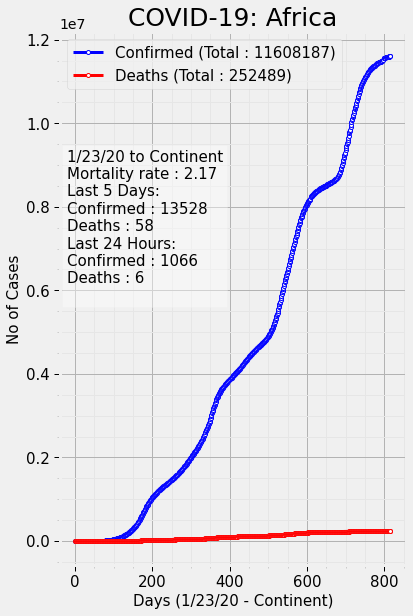

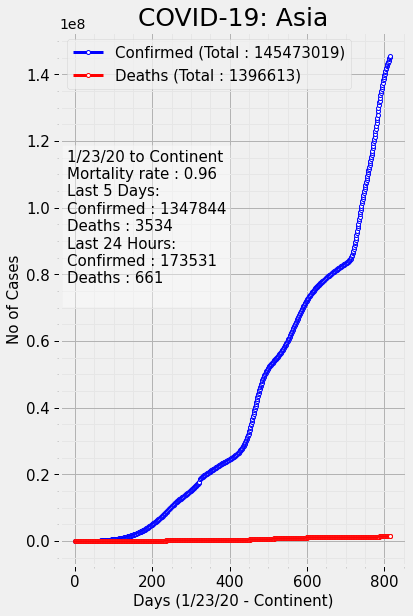

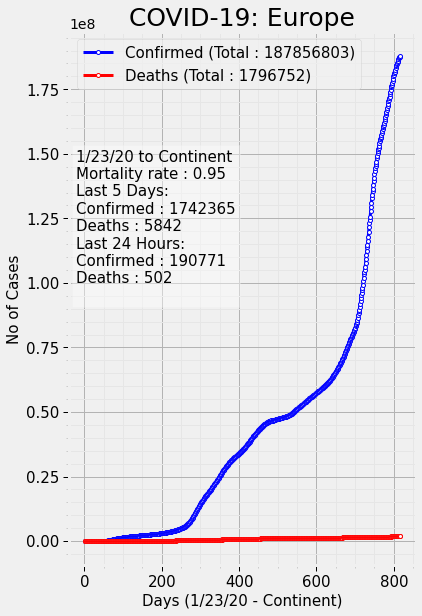

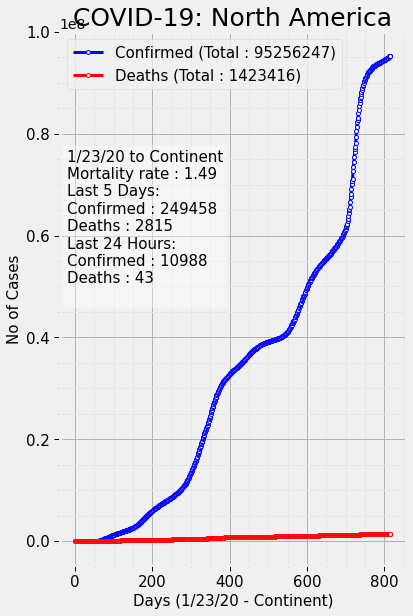

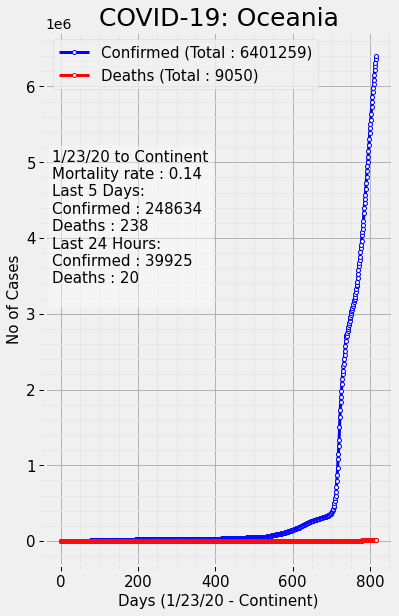

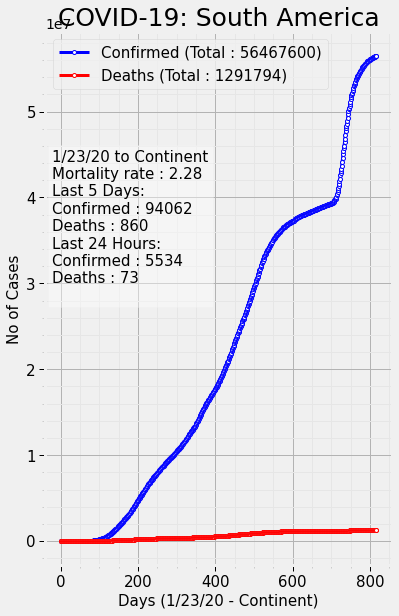

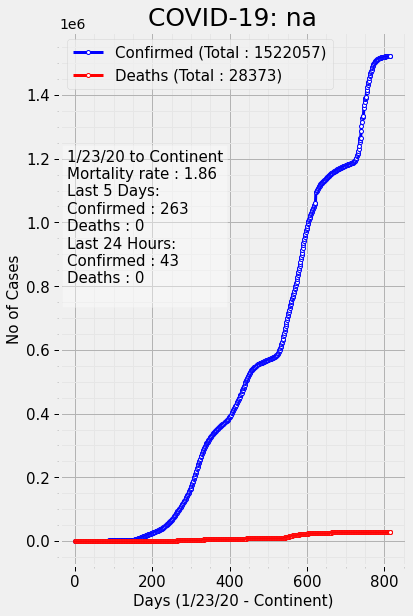

In [ ]:
for i in continents_df.index:
  visualize_covid_cases(confirmed_df, deaths_df, continent= i , country = None , state = None, period = None, figure = 221,scale = "linear")



# **Problem 12:**
Visualize the covariance matrix for continents_df.**


In [ ]:
continents_df

,Confirmed,Deaths,Recoveries,Active
Continent,,,,
Africa,7427587040,180914464,1.787372e+10,-1.091116e+10
Asia,68049858642,931265274,5.077976e+09,6.056059e+10
Europe,72400223676,1278518486,7.733062e+09,5.473186e+10
North America,54490135718,1090344364,4.438989e+09,4.896080e+10
Oceania,867574146,2874740,1.528051e+09,-6.635962e+08
South America,35790766260,1046910998,8.975660e+09,2.508365e+10
na,872234092,17702964,1.355450e+09,-8.744955e+08


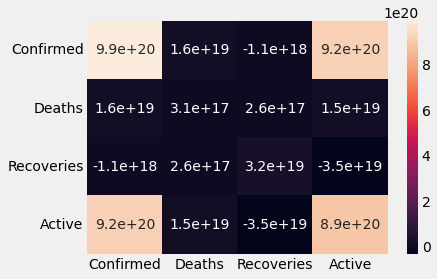

In [ ]:
# Covariance matrix in Confirmed, Deaths, Recoveries, Active
import seaborn as sns

sns.heatmap(continents_df[['Confirmed','Deaths','Recoveries','Active']].astype('float64').cov(), annot = True)

In [ ]:
# Function to create DataFrame
def correlation(data):
  return pd.DataFrame({
    'Africa': data.groupby('Continent').sum().iloc[0,3:],
    'Asia': data.groupby('Continent').sum().iloc[1,3:],
    'Europe': data.groupby('Continent').sum().iloc[2,3:],
    'North America': data.groupby('Continent').sum().iloc[3,3:],
    'Oceania':data.groupby('Continent').sum().iloc[4,3:],
    'South America': data.groupby('Continent').sum().iloc[5,3:],
    'na':data.groupby('Continent').sum().iloc[6,3:]})

In [ ]:
recoveries_df['Continent'] = recoveries_df['Country/Region'].apply(lambda x: country_to_continent(x))

Text(0.5, 1.0, 'Covariance matrix between Continent in # of Confirmed Case')

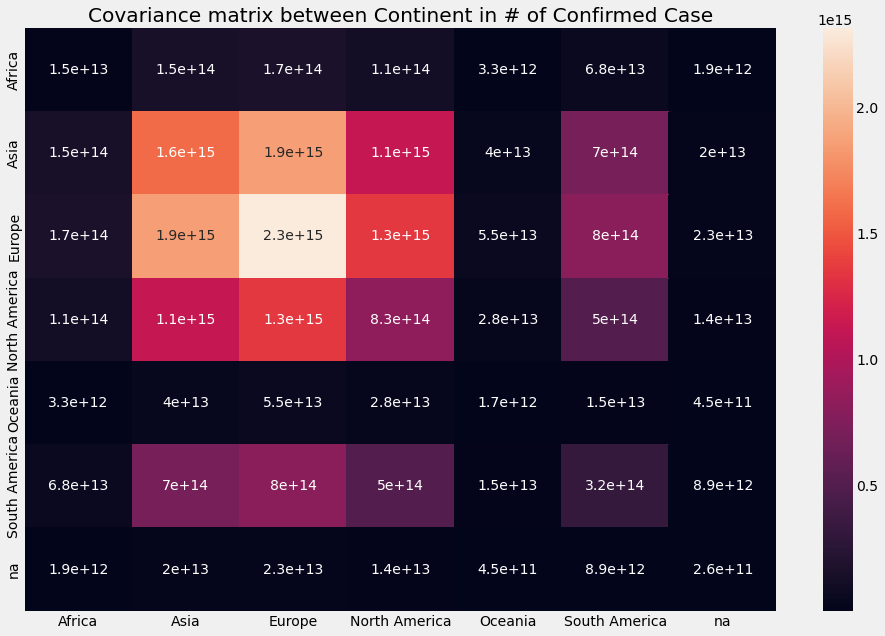

In [ ]:
# Covariance matrix between Continent in # of Confirmed Case
new = correlation(confirmed_df)
plt.figure(figsize = (15,10))
corr = new[['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America','na']].cov()

sns.heatmap(corr, annot =True).set_title("Covariance matrix between Continent in # of Confirmed Case")

Text(0.5, 1.0, '# Covariance matrix between Continent in # of Deaths Case')

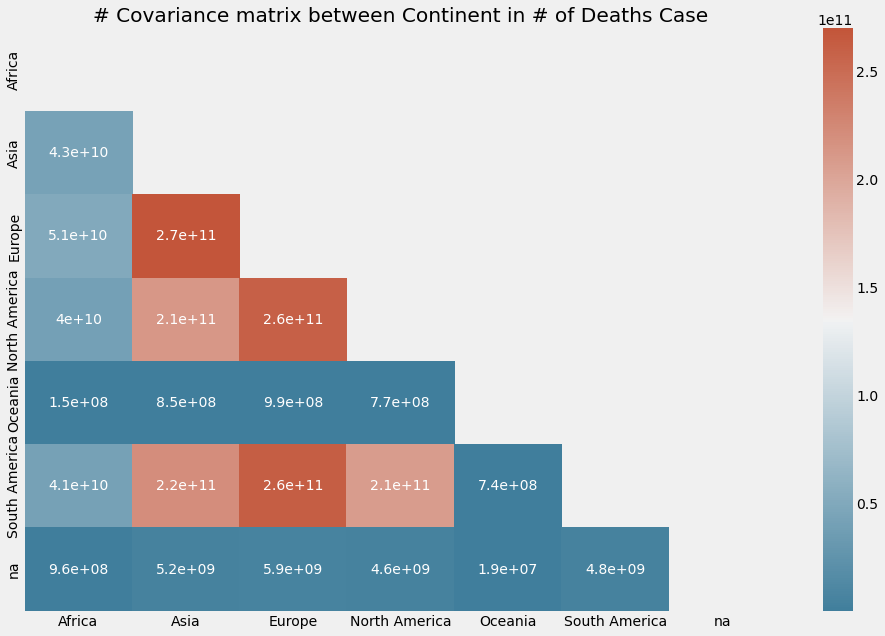

In [ ]:
# Covariance matrix between Continent in # of Deaths Case
new = correlation(deaths_df)
plt.figure(figsize = (15,10))
corr = new[['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America','na']].cov()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, annot = True).set_title("# Covariance matrix between Continent in # of Deaths Case")

Text(0.5, 1.0, '# Covariance matrix between Continent in # of Recoveries Case')

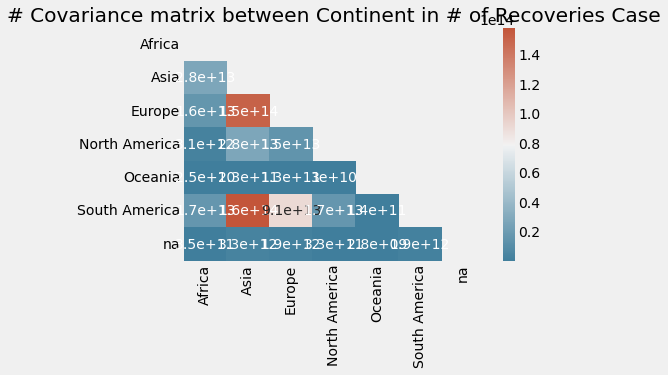

In [ ]:
# Covariance matrix between Continent in # of Recoveries Case
new = correlation(recoveries_df)
corr = new[['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America','na']].cov()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, annot = True).set_title("# Covariance matrix between Continent in # of Recoveries Case")

# **Problem 13:** 
Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.

Each field (confirm, deaths, ...) should be presented in different pie charts.
You are not allowed to use repeated code snippet here, let try to use a for loop.


In [ ]:
continents_df['Mortality Rate'] = continents_df.apply(lambda x: x['Deaths']/x['Confirmed'], axis = 1)

In [ ]:
# Import download_plotlyjs, init_notebook_mode, plot, iplot
# Create function plotpie to draw pie chart
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
def plotpie(x,y):
  trace = go.Pie(labels = continents_df[x], values = continents_df[y].to_list())
  layout = go.Layout(title = 'World Total {} Covid 19 cases by Continents'.format(y), 
                     plot_bgcolor = 'rgb(230,230,230)',
                     showlegend = True)
  fig = go.Figure(data = [trace], layout = layout)
  return iplot(fig)

In [ ]:
continents_df.reset_index(inplace =True)

In [ ]:
plotpie("Continent","Confirmed")

In [ ]:
plotpie("Continent","Deaths")

In [ ]:
plotpie("Continent","Deaths")

In [ ]:
plotpie("Continent","Recoveries")

In [ ]:
plotpie("Continent","Active")

# **6. Country analysis**

# **Problem 14:** 
Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
title


In [ ]:
import math 
country_no_nan = country_df.dropna(axis = 0)
m = folium.Map(location = [country_no_nan.iloc[0,:]['Lat'],
                           country_no_nan.iloc[0,:]['Long']],
               zoom_start = 1)
for i in range(0,len(country_no_nan)):
  folium.Circle(location = [country_no_nan.iloc[i,:]['Lat'],
                            country_no_nan.iloc[i,:]['Long']],
      radius = 10000*math.log10(country_no_nan.iloc[i,:]['Confirmed'])
  ).add_to(m)
m  
  

In [ ]:
# Deaths Circle
country_deaths = country_no_nan.loc[country_no_nan['Deaths'] > 0].dropna(axis = 0)
m = folium.Map(location = [country_no_nan.iloc[0,:]['Lat'],
                           country_no_nan.iloc[0,:]['Long']],
               zoom_start = 1)
for i in range(0,len(country_deaths)):
  folium.Circle(location = [country_deaths.iloc[i,:]['Lat'],country_deaths.iloc[i,:]['Long']],
      radius = 10000*math.log10(country_deaths.iloc[i,:]['Deaths'])
  ).add_to(m)
m  
  

In [ ]:
# Recoveries Circles
country_recoveries = country_no_nan.loc[country_no_nan['Recoveries'] > 0].dropna(axis = 0)
m = folium.Map(location = [country_no_nan.iloc[0,:]['Lat'],
                           country_no_nan.iloc[0,:]['Long']],
               zoom_start = 1)
for i in range(0,len(country_recoveries)):
  folium.Circle(location = [country_recoveries.iloc[i,:]['Lat'],country_recoveries.iloc[i,:]['Long']],
      radius = 10000*math.log10(country_recoveries.iloc[i,:]['Recoveries'])
  ).add_to(m)
m  
  

In [ ]:
country_no_nan['mortality Rate'] = country_no_nan.apply(lambda x: x['Deaths']/x['Confirmed'], axis = 1)

In [ ]:
# Mortality Circles
country_mortality = country_no_nan.loc[country_no_nan['mortality Rate'] > 0].dropna(axis = 0)
m = folium.Map(location = [country_no_nan.iloc[0,:]['Lat'],
                           country_no_nan.iloc[0,:]['Long']],
               zoom_start = 1)
for i in range(0,len(country_mortality)):
  folium.Circle(location = [country_mortality.iloc[i,:]['Lat'],country_mortality.iloc[i,:]['Long']],
      radius = country_mortality.iloc[i,:]['mortality Rate']).add_to(m)
m  
  

## **Problem 15:** 
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [ ]:
# Create Iso_code for country using pycountry
def country_to_iso_code(country):
    try:
        return pc.country_name_to_country_alpha3(country)
    except :
        return 'na'



In [ ]:
# Add new column as "iso_code"
country_df_copy = country_df.reset_index().copy()

country_df_copy['Confirmed_1'] =country_df_copy['Confirmed'] 
country_df_copy['iso_code'] = country_df_copy['Country/Region'].apply(lambda x: country_to_iso_code(x))

In [ ]:
# Worldwide mapping function 
def plot_ww_numbers(data, color, hover_data, title):
  fig = px.choropleth(data, locations = 'iso_code',
                      color = color, hover_data = hover_data,
                      color_continuous_scale = px.colors.sequential.Plasma)
  layout = go.Layout(title = go.layout.Title(
      text = f"<b> {title} </b>",
      x = 0.5),
      font = dict(size = 14),
      width = 750,
      height = 350,
      margin = dict(l=0,r=0,b=0,t=30))
  
  fig.update_layout(layout)
  fig.show()

In [ ]:
plot_ww_numbers(data = country_df_copy,
                color = 'Confirmed',
                hover_data= ["Country/Region", "Confirmed"],
                title = 'Number of different vaccines used by country')

# **Problem 16:**
Filter the top 10 countries based on the number of confirmed cases.

In [ ]:
top_country_confirmed = country_df.sort_values('Confirmed', ascending = False).head(10)

In [ ]:
country_df

,Country/Region,Lat,Long,Confirmed,Deaths,Recoveries,Active,Continent
0,Afghanistan,33.939110,67.709953,132777160,5778912,36579760.0,90418488.0,Asia
1,Albania,41.153300,20.168300,165868328,2655300,45305304.0,117907724.0,Europe
2,Algeria,28.033900,1.659600,190453104,5331488,51340466.0,133781150.0,Africa
3,Andorra,42.506300,1.521800,19359808,152390,6171298.0,13036120.0,Europe
4,Angola,-11.202700,17.873900,53247968,1218188,11791600.0,40238180.0,Africa
...,...,...,...,...,...,...,...,...
193,West Bank and Gaza,31.952200,35.233200,377305620,3810226,0.0,0.0,na
194,Winter Olympics 2022,39.904200,116.407400,81174,0,0.0,0.0,na
195,Yemen,15.552727,48.516388,8022746,1630280,0.0,0.0,Asia
196,Zambia,-13.133897,27.849332,176365764,2653454,0.0,0.0,Africa


# **Problem 17:** 
Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.**

In [ ]:
def top_10(i):
  country_df[i].sort_values(ascending = False).head(10).plot(kind = 'bar')
  plt.title("Top 10 countries of {} case".format(i))


In [ ]:
country_df.set_index('Country/Region', inplace = True)

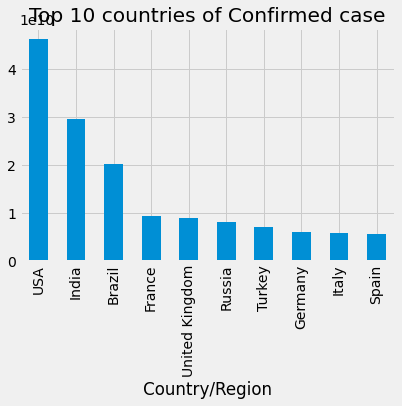

In [ ]:
# Top 10 Confirmed
top_10('Confirmed')

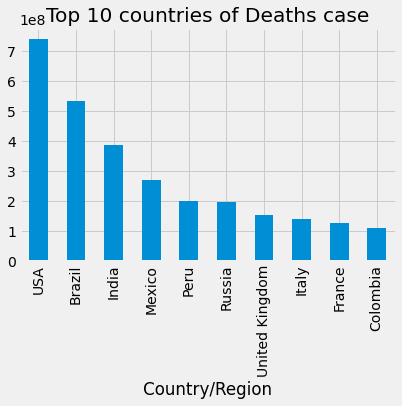

In [ ]:
# Top 10 Deaths
top_10('Deaths')

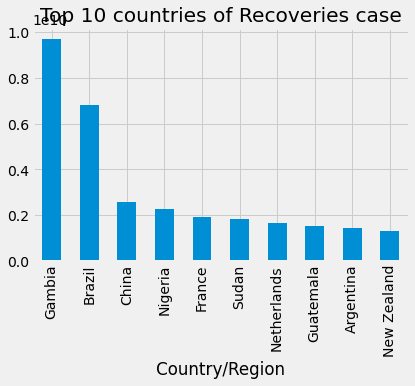

In [ ]:
# Top 10 Recoveries
top_10('Recoveries')

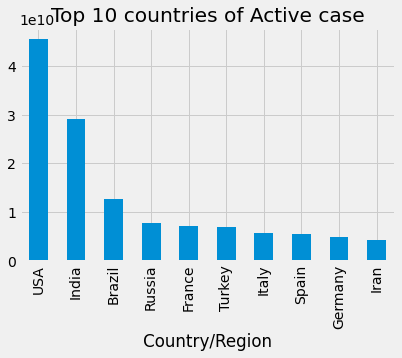

In [ ]:
# Top 10 Active
top_10('Active')

# **Problem 18:**
Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
Put your answer here:

Text(0.5, 1.0, '# of Coronavirus Cases Over Time')

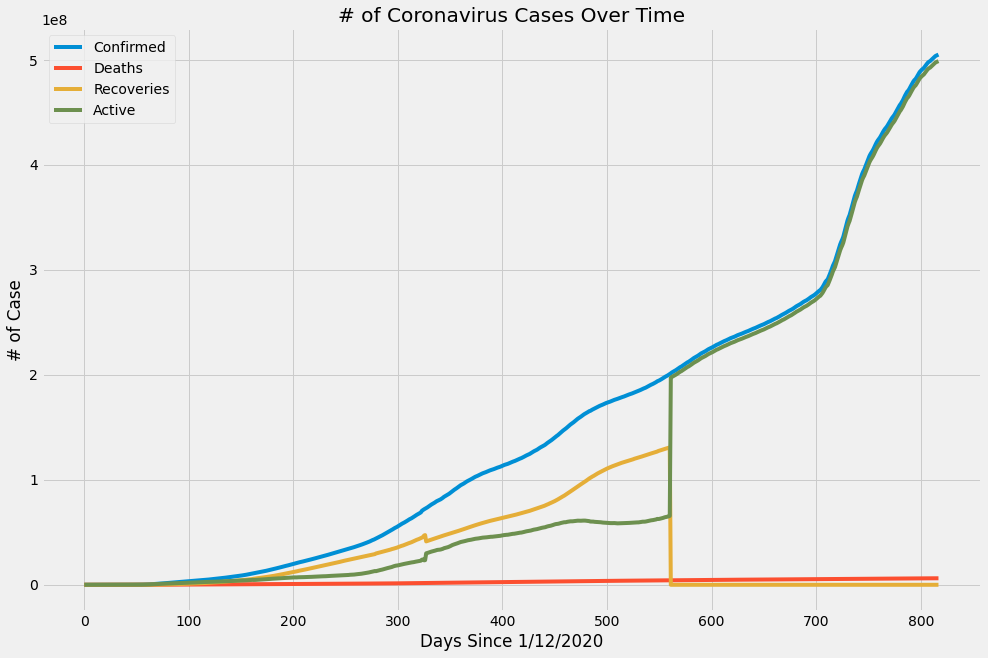

In [ ]:
base_stats.iloc[:,:][['Confirmed','Deaths','Recoveries','Active']].plot(kind = 'line', figsize = (15,10))
plt.ylabel('# of Case')
plt.xlabel('Days Since 1/12/2020')
plt.title('# of Coronavirus Cases Over Time')

In [ ]:
# Not Yet

# **Problem 19:**
Based on the data visualization on the continent part:

19.1 Which continent has the highest death rate over continents' active cases?

19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?

19.3 Which continent has the highest recoveries rate over continents' dataset?
(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before). Put your answer here:

In [ ]:
#19.1 Continents with highest death rate
continents_df.sort_values('Mortality Rate',ascending = False)['Continent'].head(1)

5    South America
Name: Continent, dtype: object

In [ ]:
# 19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
confirmed_10_days = confirmed_df.iloc[:,-11:].groupby("Continent").sum().sum(axis = 1)
dead_10_days_bf = deaths_df.iloc[:,np.r_[4:(len(deaths_df.columns)-10),-1]].groupby('Continent').sum().sum(axis = 1)
spread_data = confirmed_10_days.to_frame(name = 'Confirmed').merge(dead_10_days_bf.to_frame(name = 'Deaths'), 
                                                                   left_on =  'Continent', 
                                                                   right_on =  'Continent')
spread_data['Spread_rate'] = spread_data.apply(lambda x: x['Deaths']/x['Confirmed'], axis = 1)
spread_data.sort_values('Spread_rate', ascending = False).head(1)

,Confirmed,Deaths,Spread_rate
Continent,,,
South America,564075759,511833842,0.907385


In [ ]:
# 19.3 Which continent has the highest recoveries rate over continents' dataset? 
confirmed_10_days = confirmed_df.iloc[:,-11:].groupby("Continent").sum().sum(axis = 1)
recovered_10_days_bf = recoveries_df.iloc[:,np.r_[4:(len(recoveries_df.columns)-10),-1]].groupby('Continent').sum().sum(axis = 1)
recover_data = confirmed_10_days.to_frame(name = 'Confirmed').merge(recovered_10_days_bf.to_frame(name = 'Recoveries'), 
                                                                   left_on =  'Continent', 
                                                                   right_on =  'Continent')
recover_data['Recoveries_rate'] = recover_data.apply(lambda x: x['Confirmed']/x['Recoveries'], axis = 1)
recover_data.sort_values('Recoveries_rate', ascending = False).head(1)

,Confirmed,Recoveries,Recoveries_rate
Continent,,,
Oceania,62256707,11650490,5.343699


# **Problem 20**
Based on the data visualization on the country part:

20.1 Which country has the highest death rate over countries' dataset?

20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?

20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

In [ ]:
#20.1 Which country has the highest death rate over countries' dataset?
country_df['Death Rate'] = country_df.apply(lambda x: x['Deaths']/x['Confirmed'], axis = 1)
country_df.sort_values('Death Rate',ascending = False).head(1)

,Lat,Long,Confirmed,Deaths,Recoveries,Active,Continent,Death Rate
Country/Region,,,,,,,,
MS Zaandam,0.0,0.0,13480,2992,39212062.0,-39201574.0,na,0.221958


In [ ]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/22,4/11/22,4/12/22,4/13/22,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,Continent
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,177974,178141,178257,178295,178352,178373,178387,178418,178457,Asia
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274219,274219,274272,274320,274376,274429,274462,274504,274520,Europe
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265724,265727,265730,265731,265733,265738,265739,265739,265741,Africa
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,40328,40328,40328,40709,40709,40709,40709,40709,40709,Europe
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656287,656287,656617,656617,656617,656617,656617,656617,656617,na
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,na
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11813,11814,11814,11815,11815,11817,11817,11817,11818,Asia
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,317483,317804,317804,318113,318229,318404,318467,318515,318515,Africa


In [ ]:
# 20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
confirmed_c_10_days = confirmed_df.iloc[:,np.r_[1,4:(len(deaths_df.columns)-10),-1]].groupby("Country/Region").sum().sum(axis = 1)
dead_c_10_days_bf = deaths_df.iloc[:,np.r_[1,4:(len(deaths_df.columns)-10),-1]].groupby('Country/Region').sum().sum(axis = 1)
spread_data_c = confirmed_c_10_days.to_frame(name = 'Confirmed').merge(dead_c_10_days_bf.to_frame(name = 'Deaths'), 
                                                                   left_on =  'Country/Region', 
                                                                   right_on =  'Country/Region')
spread_data_c['Spread_rate'] = spread_data_c.apply(lambda x: x['Deaths']/x['Confirmed'], axis = 1)
spread_data_c.sort_values('Spread_rate', ascending = False).head(1)

,Confirmed,Deaths,Spread_rate
Country/Region,,,
MS Zaandam,6659,1478,0.221955


In [ ]:
# 20.3 Which country has the highest recoveries rate over countries' dataset? Put your answer here:

confirmed_c_10_days = confirmed_df.iloc[:,np.r_[1,4:(len(deaths_df.columns)-10),-1]].groupby("Country/Region").sum().sum(axis = 1)
recovered_c_10_days_bf = recoveries_df.iloc[:,np.r_[1,4:(len(recoveries_df.columns)-10),-1]].groupby("Country/Region").sum().sum(axis = 1)
recover_c_data = confirmed_c_10_days.to_frame(name = 'Confirmed').merge(recovered_c_10_days_bf.to_frame(name = 'Recoveries'), 
                                                                   left_on =  "Country/Region", 
                                                                   right_on =  "Country/Region")
recover_c_data['Recoveries_rate'] = recover_c_data.apply(lambda x: x['Recoveries']/x['Confirmed'], axis = 1)
recover_c_data.sort_values('Recoveries_rate', ascending = False).head(1)

,Confirmed,Recoveries,Recoveries_rate
Country/Region,,,
Diamond Princess,558212,340257,0.609548


# **Problem 21: USA dataset**

Based on the USA data:

21.1 Which state has the highest death rate over states' dataset?

21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?

21.3 Which state has the highest recoveries rate over states' dataset?

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [ ]:
# 21.1 Which state has the highest death rate over states' dataset?
(us_medical_data.groupby("Province_State")["Deaths"].sum()/us_medical_data.groupby("Province_State")["Confirmed"].sum()).sort_values(ascending = False).head(1)

Province_State
Connecticut    0.092345
dtype: float64

In [ ]:
us_medical_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,916.383942,663719.0,2914.0,2.241164,84000001,USA,13536.486998,6.493159
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,161.849237,123753.0,NaN,1.351351,84000002,USA,16916.662680,NaN
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,0.000000,696.0,NaN,NaN,16,ASM,1250.876152,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,1393.858286,873294.0,5188.0,1.802770,84000004,USA,8488.322873,5.113597
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,803.663856,344968.0,1575.0,1.203975,84000005,USA,11431.093603,6.494042
5,California,US,2020-07-07 04:34:13,36.1162,-119.6816,284354,6349,NaN,NaN,6,719.589986,4793353.0,NaN,2.233000,84000006,USA,12131.316935,NaN
6,Colorado,US,2020-07-07 04:34:13,39.0598,-105.3111,34257,1691,4603.0,27963.0,8,594.870124,355655.0,5565.0,4.936217,84000008,USA,6175.921244,16.252921
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,1317.593787,524364.0,10411.0,9.234503,84000009,USA,14707.483577,22.162381
8,Delaware,US,2020-07-07 04:34:13,39.3185,-75.5071,12293,572,6778.0,4943.0,10,1262.420874,127179.0,NaN,4.653055,84000010,USA,13060.556767,NaN
9,Diamond Princess,US,2020-07-07 04:34:13,NaN,NaN,49,0,NaN,NaN,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [ ]:
# 21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
((us_medical_data.groupby("Province_State")["Confirmed"].sum() - 
    us_medical_data.groupby("Province_State")["Deaths"].sum() - 
    us_medical_data.groupby("Province_State")["Recovered"].sum())/us_medical_data.groupby("Province_State")["Confirmed"].sum()).sort_values(ascending = False).head(1)

Province_State
Diamond Princess    1.0
dtype: float64

In [ ]:
#21.3 Which state has the highest recoveries rate over states' dataset?
(us_medical_data.groupby("Province_State")["Recovered"].sum()/us_medical_data.groupby("Province_State")["Confirmed"].sum()).sort_values(ascending = False).head(1)

Province_State
Minnesota    0.879126
dtype: float64

# **Problem 22**

Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [ ]:
reg = us_medical_data.set_index("Province_State").sort_values(by = "Confirmed",ascending = False).head(10)

In [ ]:
import statsmodels.formula.api as sm
result = sm.ols(formula="Confirmed ~ Incident_Rate + People_Tested + People_Hospitalized + Testing_Rate + Hospitalization_Rate", data=reg).fit()
print(result.params)
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Intercept              -364398.464650
Incident_Rate              359.402947
People_Tested                0.220914
People_Hospitalized         -8.139397
Testing_Rate               -40.896088
Hospitalization_Rate     31551.192093
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning:

divide by zero encountered in double_scalars



                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Wed, 20 Apr 2022   Prob (F-statistic):                nan
Time:                        01:37:32   Log-Likelihood:                 88.219
No. Observations:                   6   AIC:                            -164.4
Df Residuals:                       0   BIC:                            -165.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.644e+05 